In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
P = 100
Si = 2
Sh = 3
So = 1

In [5]:
np.random.seed(123)
x = np.random.uniform(-5,5,(P,Si))
z = np.sign( np.prod(x,axis=1).reshape((P,So)))

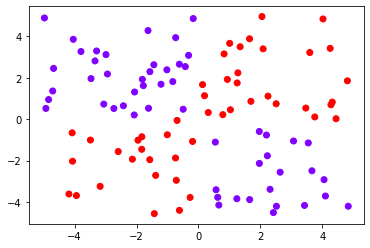

In [6]:
plt.scatter( x[:,0], x[:,1], c = z.flatten(), cmap = cm.rainbow)
plt.show()

In [90]:
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

np.random.seed(123)
W1 = np.random.normal(0,0.1,(Si+1,Sh))
W2 = np.random.normal(0,0.1,(Sh+1,So))

In [20]:
def bias_add(V):
    bias = -np.ones( (len(V),1) )
    return np.concatenate( (V,bias), axis=1)
    #return np.hstack( [V,bias] ) # Funciona igual que lo de arriba

def bias_sub(V):
    return V[:,:-1] # Saco la ultima columna

In [91]:
# Y0 = X, Y1 = S1*(Y0*W1), Y2 = S2*(Y1*W2)
# S1, S2 funciones de activacion.

Y0[:] = bias_add(x)
Y1[:] = bias_add( np.tanh(np.dot( Y0,W1 )) )
Y2[:] = np.tanh( np.dot( Y1, W2 ) )

E2 = z - Y2
dy2 = 1 - Y2**2
D2 = E2*dy2
eta = 0.001
delta_W2 = eta*np.dot(Y1.T,D2)

E1 = np.dot(D2,W2.T)
dy1 = 1 - Y1**2
D1 = bias_sub(E1*dy1)
delta_W1 = eta*np.dot(Y0.T,D1)

In [92]:
W1 += eta*delta_W1
W2 += eta*delta_W2

In [93]:
error_capa_salida = np.mean( np.square(E2))
error_capa_salida

1.0054615947360206

In [94]:
iter = 0
errores_capa_salida = []
errores_capa_oculta = []
while error_capa_salida > 0.0001 and iter < 99:
    
    Y1[:] = bias_add( np.tanh(np.dot( Y0,W1 )) )
    Y2[:] = np.tanh( np.dot( Y1, W2 ) )
    
    E2 = z - Y2
    dy2 = 1 - Y2**2
    D2 = E2*dy2
    delta_W2 = eta*np.dot(Y1.T,D2)

    E1 = np.dot(D2,W2.T)
    dy1 = 1 - Y1**2
    D1 = bias_sub(E1*dy1)
    delta_W1 = eta*np.dot(Y0.T,D1)
    
    W1 += eta*delta_W1
    W2 += eta*delta_W2
    
    error_capa_oculta = np.mean( np.square(E1))
    error_capa_salida = np.mean( np.square(E2))
    
    errores_capa_salida.append(error_capa_salida)
    errores_capa_oculta.append(error_capa_oculta)
    iter += 1
    
    if iter % 10 == 0: print(error_capa_salida,iter)

1.0054280555828172 10
1.0053945576806833 20
1.005361100948948 30
1.005327685307076 40
1.0052943106746637 50
1.0052609769714427 60
1.0052276841172765 70
1.0051944320321629 80
1.005161220636232 90


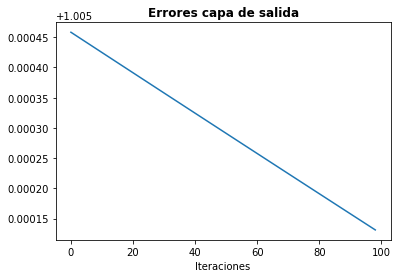

In [101]:
plt.plot(errores_capa_salida)
plt.title("Errores capa de salida", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()

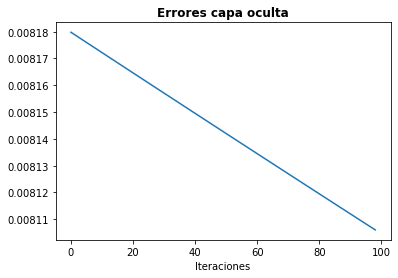

In [102]:
plt.plot(errores_capa_oculta)
plt.title("Errores capa oculta", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()